In [78]:
import requests
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [79]:
cidade = 'Campina Grande'
dia = 10
mes = 11
ano = 2021
hoje = dt.datetime.today().timestamp()
data = dt.datetime(ano, mes, dia).timestamp()

resposta_cidade = requests.get(f'http://api.openweathermap.org/geo/1.0/direct?q={cidade}&appid=51f1f5550cf467bd43498d3a39116d03').json()

In [80]:
lat = resposta_cidade[0]['lat']
lon = resposta_cidade[0]['lon']

historico_qual_ar = requests.get(f'http://api.openweathermap.org/data/2.5/air_pollution/history?lat={lat}&lon={lon}&start={data:.0f}&end={hoje:.0f}&appid=51f1f5550cf467bd43498d3a39116d03').json()


In [81]:
df = pd.json_normalize(historico_qual_ar['list'])
df.drop('main.aqi', inplace=True, axis=1)
df.head()

,dt,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
0,1636513200,260.35,0.0,3.38,28.97,0.75,5.03,10.83,0.66
1,1636516800,260.35,0.0,2.91,28.61,0.75,5.15,11.39,0.68
2,1636520400,260.35,0.0,2.78,27.89,0.78,5.42,12.23,0.70
3,1636524000,263.69,0.0,3.21,26.82,0.91,5.95,13.02,0.74
4,1636527600,273.70,0.0,3.94,25.39,1.15,6.39,12.89,0.76


In [82]:
df.rename(columns={
    'dt':'Data',
    'components.co':'CO',
    'components.no':'NO',
    'components.no2':'NO2',
    'components.o3':'O3',
    'components.so2':'SO2',
    'components.pm2_5':'PM2_5',
    'components.pm10':'PM10',
    'components.nh3':'NH3',
}, inplace=True)
df['Data'] = pd.to_datetime(df['Data'],unit='s')
#print(type(df.loc[0, "Data"]))
df['Data'] = [minha_data.strftime("%d/%m/%Y") for minha_data in df['Data']]

df.head()

,Data,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
0,10/11/2021,260.35,0.0,3.38,28.97,0.75,5.03,10.83,0.66
1,10/11/2021,260.35,0.0,2.91,28.61,0.75,5.15,11.39,0.68
2,10/11/2021,260.35,0.0,2.78,27.89,0.78,5.42,12.23,0.70
3,10/11/2021,263.69,0.0,3.21,26.82,0.91,5.95,13.02,0.74
4,10/11/2021,273.70,0.0,3.94,25.39,1.15,6.39,12.89,0.76


In [83]:
#TODO Resolver esse BO pra deixar o dataframe ordenado!
#Nome de variável provisório
atualizado = df.groupby('Data').mean().reset_index()
atualizado

,Data,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
0,01/01/2022,319.877500,0.097083,2.898750,19.603333,0.647083,3.003750,6.465833,0.627917
1,01/02/2022,331.700417,0.338750,4.065417,30.068750,1.075417,7.230833,11.955417,0.770417
2,01/03/2022,313.341250,0.118750,2.952500,44.851667,0.986667,4.062917,9.655833,0.802500
3,01/04/2022,314.731250,0.194583,4.762917,36.358750,1.398750,3.875833,7.426250,1.003333
4,01/05/2022,240.325417,0.072083,2.508750,33.476250,0.845000,2.991667,6.708333,0.616667
...,...,...,...,...,...,...,...,...,...
401,31/05/2022,293.871250,0.122917,6.627500,22.601667,1.515417,3.787083,5.175000,0.662083
402,31/07/2022,253.677917,0.049167,3.562917,40.397083,1.095417,4.533333,7.267917,0.670833
403,31/08/2022,214.526667,0.057917,2.312917,37.074583,0.717083,2.172083,4.518750,0.591250
404,31/10/2022,317.513333,0.074583,2.952083,42.319167,0.974167,3.661667,8.402083,0.768333


In [84]:
atualizado.loc[:, "Data"] = [pd.Timestamp(day = int(item.split("/")[0]), month = int(item.split("/")[1]), year = int(item.split("/")[2])) for item in atualizado.loc[:, "Data"]]
atualizado = atualizado.set_index("Data").sort_index()
atualizado

,CO,NO,NO2,O3,SO2,PM2_5,PM10,NH3
Data,,,,,,,,
2021-11-10,261.624762,0.103333,2.832381,37.431905,0.862381,4.335714,8.258571,0.681429
2021-11-11,303.466667,0.140417,3.519167,37.059583,1.313333,4.000000,8.248750,0.823333
2021-11-12,307.080000,0.000000,5.230000,30.040000,1.340000,5.000000,7.740000,0.820000
2021-11-13,335.382174,0.134348,3.130435,34.573913,0.931739,5.046957,8.923913,0.731739
2021-11-14,344.215833,0.105833,2.150417,32.811667,0.625000,3.777083,7.587500,0.644583
...,...,...,...,...,...,...,...,...
2022-12-19,362.574167,0.123333,2.892500,39.785833,0.886250,3.165833,7.502500,0.851667
2022-12-20,349.085417,0.163333,3.635833,41.238750,1.872083,3.346250,6.758333,1.322500
2022-12-21,380.379167,0.149167,3.365000,40.920417,1.807917,3.903333,8.542917,1.280000


In [85]:
atualizado["CO"]

Data
2021-11-10    261.624762
2021-11-11    303.466667
2021-11-12    307.080000
2021-11-13    335.382174
2021-11-14    344.215833
                 ...    
2022-12-19    362.574167
2022-12-20    349.085417
2022-12-21    380.379167
2022-12-22    337.124167
2022-12-23    364.355263
Name: CO, Length: 406, dtype: float64

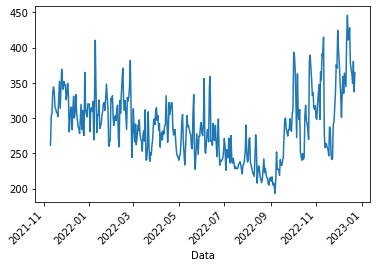

In [86]:
atualizado['CO'].plot()
plt.xticks(rotation = 45)
plt.show()